# User analytics

In [6]:
# !pip install google_auth_oauthlib 
# !pip install install google-api-python-client
# !pip install pandas 
# !pip install numpy
# !pip install matplotlib
# !pip install google-cloud-bigquery
# !pip install db-dtypes

# DEV GUIDES
#https://developers.google.com/analytics/devguides/reporting
    




In [2]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
from google_auth_oauthlib.flow import InstalledAppFlow
from googleapiclient.discovery import build
from IPython.display import display
import os
import pprint
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np
import analytics_api as ga

%load_ext autoreload
%autoreload 2

import analytics_charts as ac
GA_PROPERTY = "185740629" # HCA Data Portal/Browser
DCP_ANALYTICS_START = "2019-03-01"
TODAY = 'today'

ac.authenticate_ga()



Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=713613812354-ccedl8colb27q3q6rvvvjqrpb5tcbuug.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fanalytics.readonly&state=UsczdvMjZbhfRLtAR8YI2znJPXetOB&access_type=offline


## User Acquisition

### Daily Users and Pageviews

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=713613812354-ccedl8colb27q3q6rvvvjqrpb5tcbuug.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fanalytics.readonly&state=tWVQSAaB5BAezznuFakLuwFgOOAxFh&access_type=offline


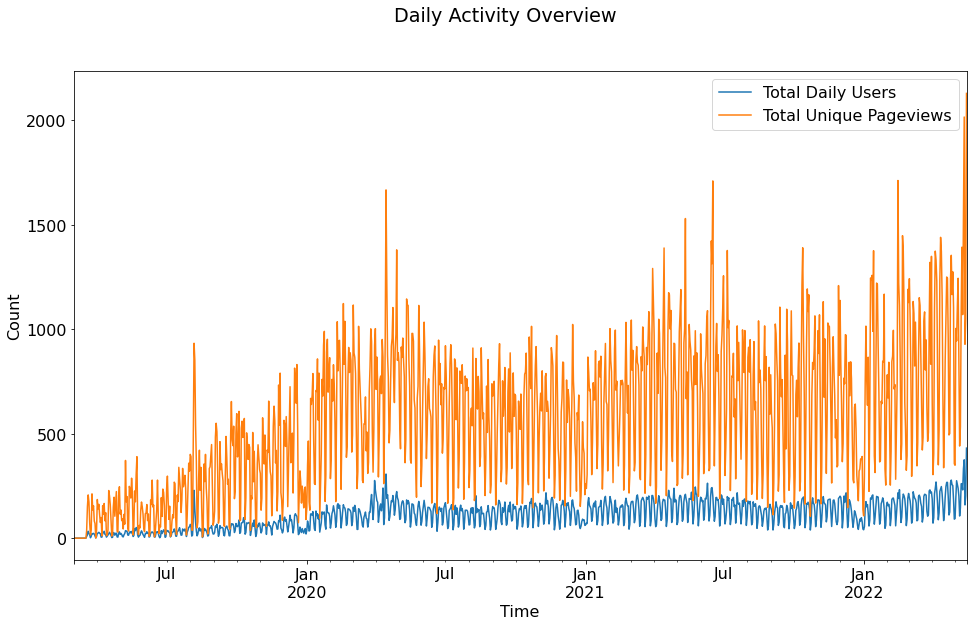

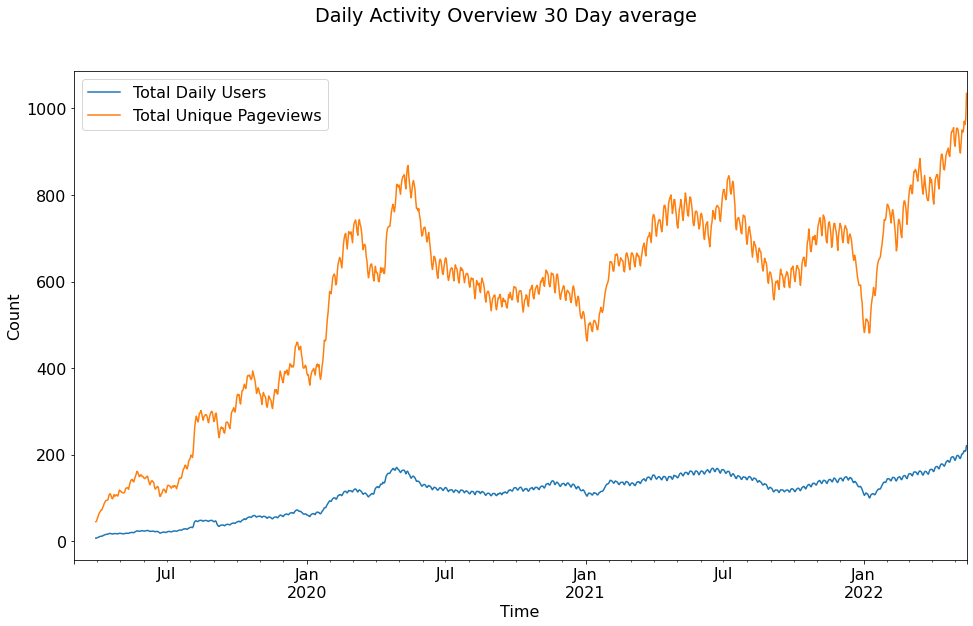

In [13]:
users_over_time_table = ac.plot_users_over_time(GA_PROPERTY, DCP_ANALYTICS_START,TODAY)

### Total Unique Users and Unique Pageviews

In [14]:
display(users_over_time_table)

### Top Referrers

In [11]:
ac.show_difference_table(GA_PROPERTY, "Users", "Referrer", "ga:users","ga:source", "2022Q1", "2021Q4")

HttpError: <HttpError 403 when requesting https://analytics.googleapis.com/analytics/v3/data/ga?ids=ga%3A185740629&start-date=2022-01-01&end-date=2022-03-31&dimensions=ga%3Asource&metrics=ga%3Ausers&segment=gaid%3A%3Aq-RjXBSdQ-i18vXOOoXl5g&start-index=1&max-results=1000&alt=json returned "User does not have sufficient permissions for this advanced segment.". Details: "[{'message': 'User does not have sufficient permissions for this advanced segment.', 'domain': 'global', 'reason': 'insufficientPermissions'}]">

### Top Countries

In [8]:
ac.show_difference_table(GA_PROPERTY, "Users", "Country", "ga:users","ga:country", "2022Q1", "2021Q4")

### Top Entrances

In [26]:
ac.show_difference_table(GA_PROPERTY, "Entrances", "Page", "ga:entrances","ga:pagePath", "2022Q1", "2021Q4")

### Users and Sessions

In [74]:
ac.show_difference_table(GA_PROPERTY, "Total Users", None, "ga:users", None, "2022Q1", "2021Q4")

In [12]:
ac.show_difference_table(GA_PROPERTY, "Returning Users", None, "ga:users", None, filters="ga:userType==Returning Visitor", period="2022Q1", prev_period="2021Q4")

In [14]:
ac.show_difference_table(GA_PROPERTY, "Total Visits", None, "ga:sessions", None, "2022Q1", "2021Q4")

In [15]:
ac.show_difference_table(GA_PROPERTY, "Sessions Including Visits to Data Portal", None, "ga:sessions", None, filters="ga:pagePath!~/explore", period="2022Q1", prev_period="2021Q4")

In [16]:
ac.show_difference_table(GA_PROPERTY, "Sessions Including Visits to Data Browser", None, "ga:sessions", None, filters="ga:pagePath=~/explore", period="2022Q1", prev_period="2021Q4")

### Social Network Referrers

In [43]:
ac.show_difference_table(GA_PROPERTY, "User Sessions", "Social Network", "ga:sessions", "ga:socialNetwork", period="2022Q1", prev_period="2021Q4")

### Downloads

In [32]:
ac.show_difference_table(GA_PROPERTY, ["Users", "Count"], "Action", ["ga:users", "ga:hits"], ["ga:eventAction", "ga:eventCategory"], filters="ga:eventCategory==Project;ga:eventAction==Download Project Manifest", ordered=False, period="2022Q1", prev_period="2021Q4")

In [42]:
ac.show_difference_table(GA_PROPERTY, ["Users", "Count"], "Download Type", ["ga:users", "ga:hits"], ["ga:dimension6", "ga:eventAction", "ga:eventCategory"], filters="ga:eventCategory==Project;ga:eventAction==Download Project Matrix", ordered=False, period="2022Q1", prev_period="2021Q4")

In [39]:
ac.show_difference_table(GA_PROPERTY, ["Users", "Count"], "curl Request From Search Results", ["ga:users", "ga:hits"], ["ga:dimension1", "ga:eventAction", "ga:eventCategory"], filters="ga:eventAction==Request;ga:dimension1==Bulk Download", ordered=False, period="2022Q1", prev_period="2021Q4")

In [55]:
ac.show_difference_table(GA_PROPERTY, ["Users", "Count"], "Metadata Request/Download From Search Results", ["ga:users", "ga:hits"], ["ga:dimension1", "ga:eventAction", "ga:eventCategory"], filters="ga:eventCategory==Manifest;ga:eventAction=~Request|Download;ga:dimension1=~Cohort Manifest|Cohort Manifest Link", ordered=False, period="2022Q1", prev_period="2021Q4")

In [44]:
ac.show_difference_table(GA_PROPERTY, ["Users", "Count"], "Request Export From Search Results", ["ga:users", "ga:hits"], ["ga:dimension3", "ga:dimension1", "ga:eventAction", "ga:eventCategory"], filters="ga:eventCategory==Export;ga:eventAction==Request;ga:dimension1==Cohort Export;ga:dimension3==Terra", ordered=False, period="2022Q1", prev_period="2021Q4")

In [45]:
ac.show_difference_table(GA_PROPERTY, ["Users", "Count"], "Action", ["ga:users", "ga:hits"], ["ga:eventAction", "ga:eventCategory"], filters="ga:eventCategory==File;ga:eventAction==Download", ordered=False, period="2022Q1", prev_period="2021Q4")

### Top Search Results Selected for Export

In [25]:
ac.show_difference_table(GA_PROPERTY, "Selected for Export Count", "Query", "ga:pageviews", "ga:pagePath", filters="ga:pagePath=~/explore/export/export-to-terra|/explore/export/get-curl-command|/explore/export/download-manifest", period="2022Q1", prev_period="2021Q4")

### Top Direct File Downloads From Files Tab

In [46]:
ac.show_difference_table(GA_PROPERTY, "Downloads", "File", "ga:hits", "ga:eventLabel", filters="ga:eventCategory==File;ga:eventAction==Download", period="2022Q1", prev_period="2021Q4")

### Top Direct File Download File Types (From Files Tab)

In [49]:
ac.show_difference_table(GA_PROPERTY, "Downloads", "File Type", "ga:hits", "ga:dimension6", filters="ga:eventCategory==File;ga:eventAction==Download", period="2022Q1", prev_period="2021Q4")

### Top Facets

In [53]:
ac.show_difference_table(GA_PROPERTY, "Count", "Facet", "ga:hits", "ga:dimension9", filters="ga:eventCategory==Search;ga:eventAction==Select", period="2022Q1", prev_period="2021Q4")

### Top Facet Terms

In [54]:
ac.show_difference_table(GA_PROPERTY, "Count", ["Facet", "Term"], "ga:hits", ["ga:dimension9", "ga:dimension10"], filters="ga:eventCategory==Search;ga:eventAction==Select", period="2022Q1", prev_period="2021Q4")

### Entity Tabs Selections (Project, Samples, Files)

In [3]:
ac.show_difference_table(GA_PROPERTY, "Count", "Entity Tab", "ga:hits", "ga:eventLabel", filters="ga:eventCategory==Entity;ga:eventAction==Select Tab", period="2022Q1", prev_period="2021Q4")

### Top Project Detail Pages

In [10]:
ac.show_difference_table(GA_PROPERTY, "Count", "Project", "ga:pageviews", "ga:pagePath", filters="ga:pagePath=~^(\\/explore\\/projects\\/[0-9a-fA-F]{8}\\-[0-9a-fA-F]{4}\\-[0-9a-fA-F]{4}\\-[0-9a-fA-F]{4}\\-[0-9a-fA-F]{12})(\\/?\\?{0}|\\/?\\?{1}.*)$", period="2022Q1", prev_period="2021Q4")

### Project Detail Supplementary Links Visits (From External Resources)

In [64]:
ac.show_difference_table(GA_PROPERTY, "Visits", "Link", "ga:hits", ["ga:dimension4", "ga:dimension6", "ga:eventLabel"], filters="ga:eventCategory==Project;ga:eventAction==View External Resource", period="2022Q1", prev_period="2021Q4")

### Withdrawn/Deprecated Projects Visits

In [65]:
ac.show_difference_table(GA_PROPERTY, "Count", "Project Type", "ga:hits", "ga:eventAction", filters="ga:eventAction=~View Deprecated Project|View Withdrawn Project", period="2022Q1", prev_period="2021Q4")

### Analysis Protocol Portal Links

In [69]:
ac.show_difference_table(GA_PROPERTY, "Count", "Analysis Protocol", "ga:hits", "ga:eventLabel", filters="ga:eventCategory==Portal Link;ga:eventAction==Click", period="2022Q1", prev_period="2021Q4")

### Top Landing Pages

In [68]:
ac.show_difference_table(GA_PROPERTY, "Count", "Path", "ga:entrances", "ga:landingPagePath", filters="ga:landingPagePath!~^\/explore", period="2022Q1", prev_period="2021Q4")

### Top Pages

In [70]:
ac.show_difference_table(GA_PROPERTY, "Count", "Path", "ga:pageviews", "ga:pagePath", filters="ga:pagePath!~^\/explore", period="2022Q1", prev_period="2021Q4")

### Top Searches

In [71]:
ac.show_difference_table(GA_PROPERTY, "Count", "Search Text", "ga:hits", ["ga:eventLabel", "ga:eventAction"], filters="ga:eventCategory==Search;ga:eventAction==Enter Text", period="2022Q1", prev_period="2021Q4")

### Top Selected Search Results

In [72]:
ac.show_difference_table(GA_PROPERTY, "Count", "Search Result", "ga:hits", ["ga:eventLabel", "ga:eventAction"], filters="ga:eventCategory==Search;ga:eventAction==Click", period="2022Q1", prev_period="2021Q4")